## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [2]:
import numpy as np
import pandas as pd

In [3]:
# read csv file

df = pd.read_csv("titanic.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# check the head of dataframe

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Contingency table Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


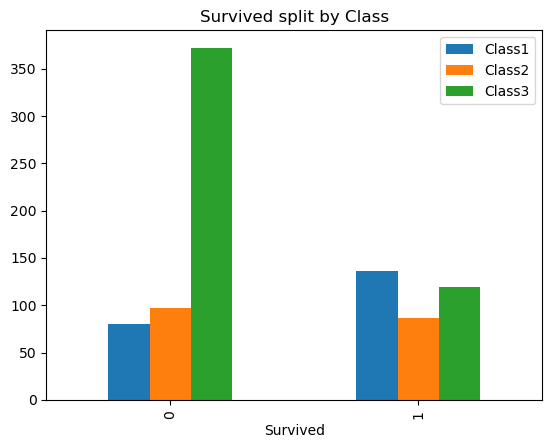

In [76]:
#Hypothesis 1

from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt

# Define column names

df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Create contingency table

contingency_table = pd.crosstab(df['Survived'], df['Pclass'])

print('Contingency table',contingency_table)

# Plot the crosstab data
contingency_table.plot(kind='bar', title = 'Survived split by Class', stacked = False)
plt.legend(["Class1", "Class2","Class3"])
plt.show()

In [64]:
# Perform chi-square test

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results

print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 102.88898875696056
p-value: 4.549251711298793e-23


In [ ]:
# Hypothesis 1 conclusion: P-value 0.00 is less than 0.05, then the null hypothesis is rejected. 
# Therefore, Survived associated with PClass. 

In [ ]:
# Hypothesis 2 : Age has relationship with Fare?
# Begin with EDA to explore variables

In [38]:
# Age has missing value, so the missing value imputation is applied

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
# Replace missing value by using mean imputation method

meanAge = np.mean(df.Age)
df.Age = df.Age.fillna(meanAge)

print (meanAge)

29.699117647058763


In [44]:
# After imputation method is applied, so age variable has no missing value. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
# Find correlation between Fare and Age
corr_matrix = np.corrcoef(df['Fare'], df['Age'])
corr_matrix

# Fare and Age has positive relationship by 9.15%

array([[1.        , 0.09156609],
       [0.09156609, 1.        ]])

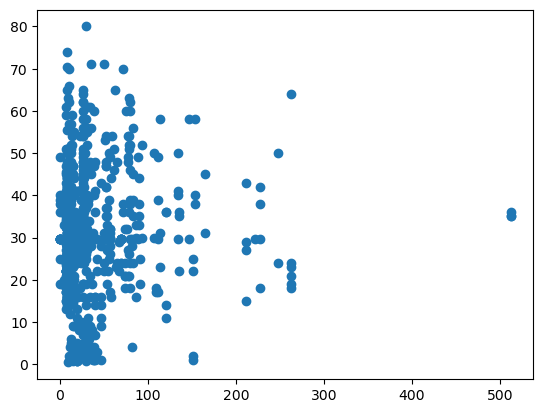

In [83]:
# The scatter plot is used to see the relationship between Fare and Age
plt.scatter(df['Fare'], df['Age'])

Contingency table Sex       female  male
Survived              
0             81   468
1            233   109


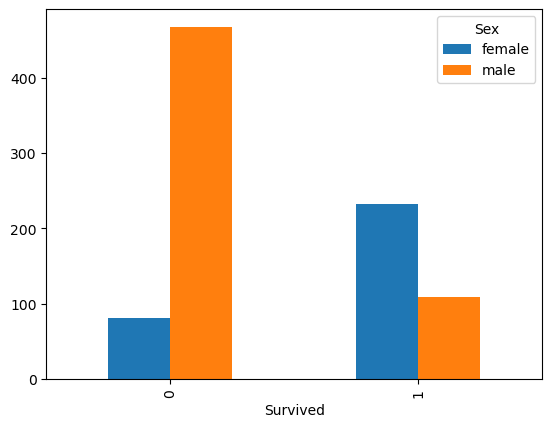

In [87]:
# Hypothesis 3

# Create contingency table
contingency_table2 = pd.crosstab(df['Survived'], df['Sex'])
print('Contingency table',contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Plot the crosstab data
contingency_table2.plot(kind='bar', stacked = False)
plt.show()

In [86]:
# Print results
print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58


In [ ]:
# Hypothesis 3 conclusion: P-value 0.00 is less than 0.05, then the null hypothesis is rejected.
# Therefore, Survived associated with Sex.